In [58]:
import sys
sys.path.append("/Users/bubble/Desktop/Project/Infrasound Sensor/Layout/Code/acousticsensor")

import gdsfactory as gf
import Tools.geo_trans as gt


In [59]:
# structure for each side
# single grid
L = [250, 500, 750, 1000]
g = [10, 20, 30]
w = 2
t = 0.5

k = (len(L) * len(g))
mesh = [None] * k
for i in range(k):
    mesh[i] = gf.Component()
side = gf.Component()
count = 0
origin = (15000 / 13, 0)
for i in range(4):
    for j in range(3):
        row = column =  L[i] // (g[j]+w)
        height = L[i] / row - w
        sg = gf.components.rectangle(size=(g[j], height), layer=(8, 0))
        for m in range(column):
            for n in range(row):
                sf_ref = mesh[count] << sg
                sf_ref.move((origin[0]+m*(g[j]+w), origin[1]+n*(height+w)))
        # add frame
        fra_width = column * (g[j] + w) + w
        frame = gf.components.rectangle(size=(fra_width, L[i]), layer=(9, 0))
        frame_ref = mesh[count] << frame
        frame_ref.movex(origin[0]-w)
        # add crystal
        mid = origin[0] - w + fra_width / 2
        cry_size = g[j] if j != 0 else 22
        crystal = gf.components.rectangle(size=(cry_size, cry_size), layer=(10, 0))
        crystal_ref = mesh[count] << crystal
        crystal_ref.move((mid-cry_size/2, L[i]-cry_size))

        mesh_ref = side << mesh[count]
        mesh_ref.movex(count * 15000 / 13)
        count += 1
        
side.show()

In [60]:
cell = gf.Component()
# backside etching 15mm * 15mm
backside = gf.components.rectangle(size=(15000, 15000), layer=(2, 0))
# cell << backside
# cell.show()

In [61]:
# structure for each die

double_side = gf.Component()
# structure for double sides
side_ref = double_side << side
side_ref.dmirror_y(15000/2).dmirror_x(15000/2)
double_side << side

# structure for 4 sides
fside = gf.Component()
dside_ref = fside << double_side
dside_ref.drotate(angle=90, center=(15000/2, 15000/2))
fside << double_side
# fside.show()

Unnamed_702: ports [], vinsts=[] info=Info() kcl=KCLayout(name='DEFAULT', layout=<klayout.dbcore.Layout object at 0x10fda47d0>, layer_enclosures=LayerEnclosureModel(root={'78687732': LayerEnclosure(layer_sections={}, main_layer=WG (1/0), yaml_tag='!Enclosure'), '5c226817': LayerEnclosure(layer_sections={}, main_layer=SLAB150 (2/0), yaml_tag='!Enclosure'), '56396fc8': LayerEnclosure(layer_sections={}, main_layer=SLAB90 (3/0), yaml_tag='!Enclosure'), '9e36fa27': LayerEnclosure(layer_sections={}, main_layer=DEEPTRENCH (4/0), yaml_tag='!Enclosure'), 'a4b5fcfc': LayerEnclosure(layer_sections={}, main_layer=8/0, yaml_tag='!Enclosure'), '4fb2b992': LayerEnclosure(layer_sections={}, main_layer=9/0, yaml_tag='!Enclosure'), 'c1ad96cb': LayerEnclosure(layer_sections={}, main_layer=10/0, yaml_tag='!Enclosure')}), cross_sections={'78687732_10500': SymmetricalCrossSection(width=10500, enclosure=LayerEnclosure(layer_sections={}, main_layer=WG (1/0), yaml_tag='!Enclosure'), name='78687732_10500'), '78

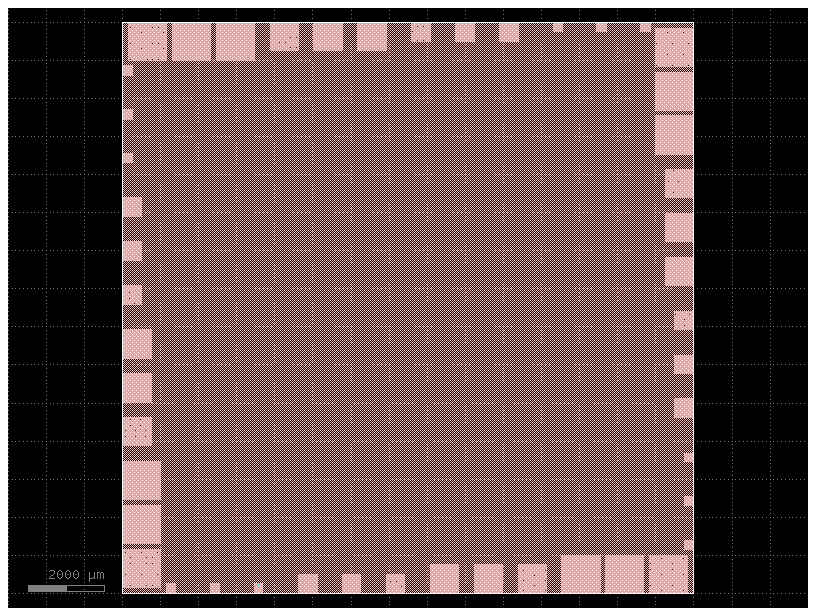

In [ ]:
# boolean operation
# do backside etching - frame
outside = gf.boolean(A = backside, B = fside,  operation="not", layer1=(2, 0), layer2=(9, 0), layer=(1, 0))
cell << outside

#  do holes etching - crystal
holes = gf.boolean(A = fside, B = fside,  operation="not", layer1=(8, 0), layer2=(10, 0), layer=(1, 0))
cell << holes

cell << backside
# cell.show()
cell.write_gds("mesh.gds")
# cell.plot()